## Stationarity Test

**stationarity** means that the probabilistic character of the series must not change over time, i.e. that any section of the time series is "typical" for every other section with the same length.  
In more specific mathematical meaning: for a time seris of ${x_t, t=0, 1, 2, ... , n}$, for each time $t$, treat the $x_t$ as a random variable, then
- $E(x_t)=\mu_t$ is constant, not changing with $t$. so $E(x_t) = \mu$ for any $t$.
- $Cov(x_{t+k}, x_t) = E[(x_{t+k}-\mu_{t+k})(x_t - \mu_t)] = E[(x_{t+k} - \mu)(x_t - \mu)]$ is constant,  not changing with $t$. so $Cov(x_{t+k}, x_t) = E[(x_k - \mu)(x_0 - \mu)]$ only depends on $k$  

Thus the $Cov(x_{t+k}, x_t)$ is not a function of $t$, it is only a function of $k$, the time lags between two variables.  

## ACF and PACF  

The autocorrelation function (ACF) is  
$$\rho(k) = \frac{Cov(x_{t+k}, x_t)}{Var(x_t)} = Corr(x_{t+k}, x_t)$$  
Because it is not related to $t$ so can let $t$ be 0. between time k and time 0 lags time k:  
$$\rho(k) = \frac{Cov(x_{k}, x_0)}{Var(x_0)} = Corr(x_{k}, x_0)$$  
With the sample dataset ${x_t, t= 0, 1, 2, ... , n}$, the calculation of ACF based on the sample set is:  
$$\rho(k) = \frac{\frac{1}{n-k+1}\displaystyle\sum_{t=0}^{n-k}(x_t - \bar{x}_n)(x_{t+k}-\bar{x}_n)}{\frac{1}{n+1}\displaystyle\sum_{t=0}^{n}(x_t-\bar{x}_n)^2}$$  
inside the $\bar{x}_n = \frac{1}{n+1}\sum_{t=0}^{n}x_t$

There is another one called "Particial autocorrelation function (PACF)". It is related with regress using previous time values, to predict current. PACF was defined like: for 1st order  
$$\phi(k=1) = Corr(x_{t+1}, x_t) = \rho(k=1)$$  
for other order ($k>=2$):  
$$\phi(k) = \frac{Cov(x_{t+k}, x_t|x_{t+k-1}x_{t+k-2}...x_{t+1})}{\sqrt{Var(x_{t+k}|x_{t+k-1}x_{t+k-2}...x_{t+1})Var(x_t|x_{t+k-1}x_{t+k-2}...x_{t+1})}}$$ 

the ACF and PACF is related with AR and MA and after calculated, they can be used to help find order. Here are sample plots.  
![Sample ACF](EstimateSampleACF.png) ![Sample PACF](EstimateSamplePACF.png)

## Decomposing to components

In time series, there are mainly four different patterns or components:  
- **Trend**: A slow but significant change of the values over time
- **Season**: A change that is cyclical and has a period of less than one year
- **Cycle**: A change that is cyclical and has a period of longer than one year
- **Random**: A component that is random; the best model for purely random data is the mean, given that it has a distribution corresponding to the normal distribution

## Read Data Analysis

Let get a new dataset, the car sales data.

In [97]:
import datetime
file_path = pathlib.Path('D:/Edu/data_resource/monthly-car-sales.csv')

carsales = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month', date_parser=lambda x: pd.to_datetime(x))
carsales

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


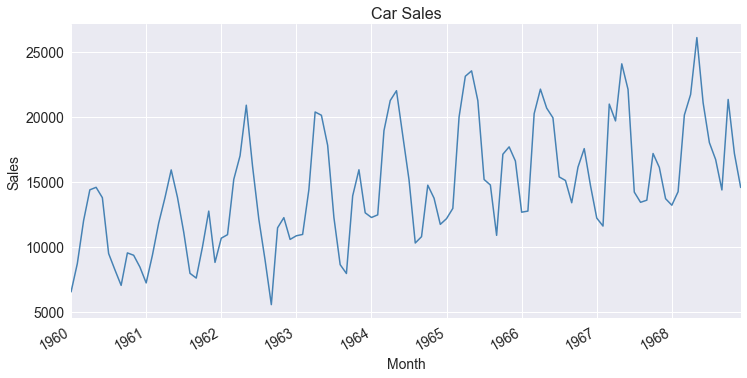

In [98]:
carsales.plot(lw=1.5, color='steelblue')
plt.gcf().autofmt_xdate()
plt.title('Car Sales')
plt.ylabel('Sales')
plt.gca().get_legend().remove()
plt.show()

It obviously has a increasing trend, and also seems have seasonal changes.  
We use ADF test from statsmodels package to check stationarity.

In [99]:
import statsmodels.tsa.stattools as stt

adfTest = stt.adfuller(carsales, regression='ct')

print(f'ADF Test Statistic\t{adfTest[0]}')
print(f'P-Value \t\t{adfTest[1]}')
print(f'# Lags Used \t\t{adfTest[2]}')
print(f'# Observations Used \t{adfTest[3]}')
for key,value in adfTest[4].items():
    print(f'Critical Value ({key}) \t {value}')

ADF Test Statistic	-1.374352602313524
P-Value 		0.8682854239258511
# Lags Used 		12
# Observations Used 	95
Critical Value (1%) 	 -4.057372178160081
Critical Value (5%) 	 -3.4577588776789616
Critical Value (10%) 	 -3.154727848082811


Test statistics is high than those critical value, and P-Value is much higher than acceptable low threshold (most commonly should be <5%).\
So it is not stationary from the test.

### patterns, decomposing data

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
carsales_decomp = seasonal_decompose(carsales)

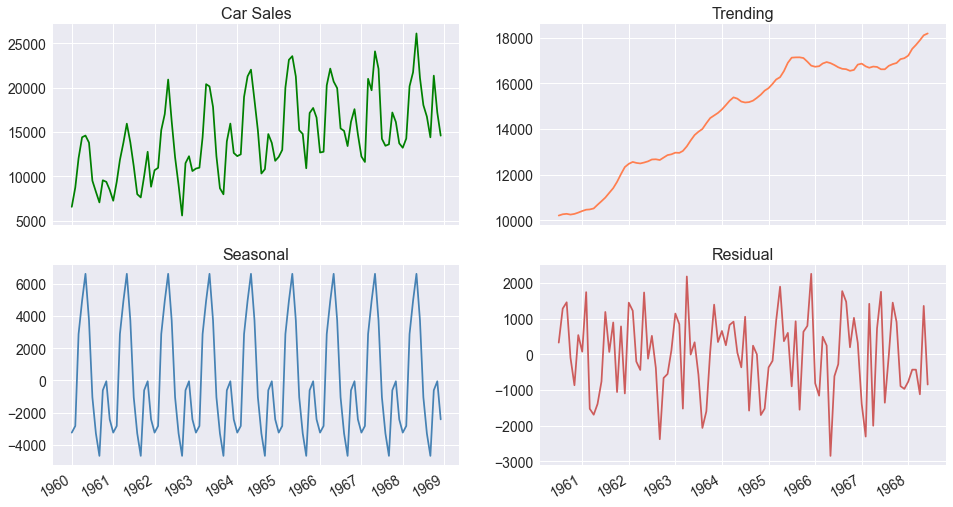

In [101]:
carsales_trend = carsales_decomp.trend
carsales_seasonal = carsales_decomp.seasonal
carsales_residual = carsales_decomp.resid
fig, axes = plt.subplots(2,2,figsize=(16,9))
axes[0][0].plot(carsales, color='green')
axes[0][0].set_title('Car Sales')
axes[0][1].plot(carsales.index, carsales_trend, color='coral')
axes[0][1].set_title('Trending')
axes[1][0].plot(carsales.index, carsales_seasonal, color='steelblue')
axes[1][0].set_title('Seasonal')
axes[1][1].plot(carsales.index, carsales_residual, color='indianred')
axes[1][1].set_title('Residual')
fig.autofmt_xdate()
plt.show()

From the seasonal pattern can find that every year has 2 peaks, one high at first half year, one lower at second half year.  
From the trending we can see that sales are increasing from 1960 towards 1969. But at 1965, 66, 67 the increasing is stopeed and continued at 1068.

The seasonal data contributes to the biggest data change within one year. We can plot the detrended data and seasonal data together, and also can have a close look at the seasonal data of one year.

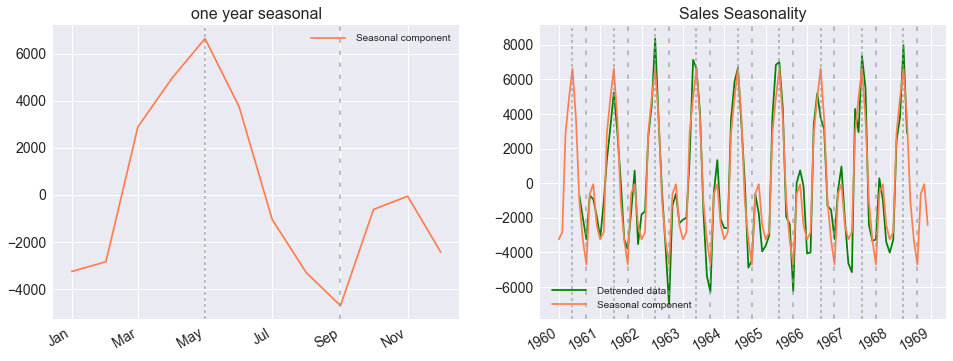

In [102]:
fig, axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(carsales_seasonal.loc['1960'], color='Coral', label='Seasonal component')
d1 = datetime.datetime(1960,9,1)
d2 = datetime.datetime(1960,5,1)
dd = datetime.timedelta(days=365)
kwrds=dict(lw=1.5, color='0.6', alpha=0.8)
for i in range(1):
    axes[0].axvline(d1+dd*i, dashes=(3,5),**kwrds)
    axes[0].axvline(d2+dd*i, dashes=(2,2),**kwrds)
axes[0].set_title('one year seasonal')
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axes[0].legend(loc='best', numpoints=4, handlelength=4)
axes[1].plot(carsales['Sales']-carsales_trend, color='Green', label='Detrended data')
axes[1].plot(carsales_seasonal, color='Coral', label='Seasonal component')
for i in range(9):
    axes[1].axvline(d1+dd*i, dashes=(3,5),**kwrds)
    axes[1].axvline(d2+dd*i, dashes=(2,2),**kwrds)
axes[1].set_title('Sales Seasonality')
axes[1].legend(loc='best', numpoints=4, handlelength=4)
fig.autofmt_xdate()
plt.show()

In [113]:
def do_adf_test(data):
    adfTest = stt.adfuller(data)
    print(f'ADF Test Statistic\t{adfTest[0]}')
    print(f'P-Value \t\t{adfTest[1]}')
    print(f'# Lags Used \t\t{adfTest[2]}')
    print(f'# Observations Used \t{adfTest[3]}')
    for key,value in adfTest[4].items():
        print(f'Critical Value ({key}) \t {value}')

carsales_residual.dropna(inplace=True)
do_adf_test(carsales_residual)

ADF Test Statistic	-4.523855907435016
P-Value 		0.00017801721326346585
# Lags Used 		12
# Observations Used 	83
Critical Value (1%) 	 -3.5117123057187376
Critical Value (5%) 	 -2.8970475206326833
Critical Value (10%) 	 -2.5857126912469153


Now we can see this residual data is stationary. The test statistics result is lower than critical values, P-Value is much lower than acceptable <5%.

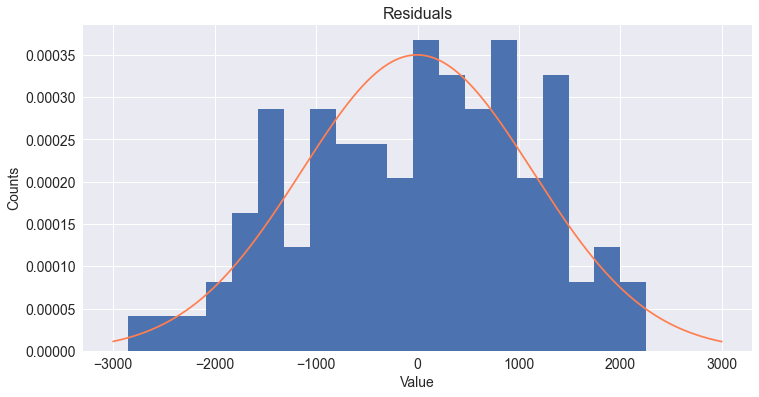

In [104]:
import scipy.stats as st

loc, shape = st.norm.fit(carsales_residual)
x = range(-3000,3000)
y = st.norm.pdf(x, loc, shape)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.hist(carsales_residual, bins=20, density=True)
ax.plot(x, y, color='Coral')
ax.set_title('Residuals')
ax.set_xlabel('Value')
ax.set_ylabel('Counts')
plt.show()

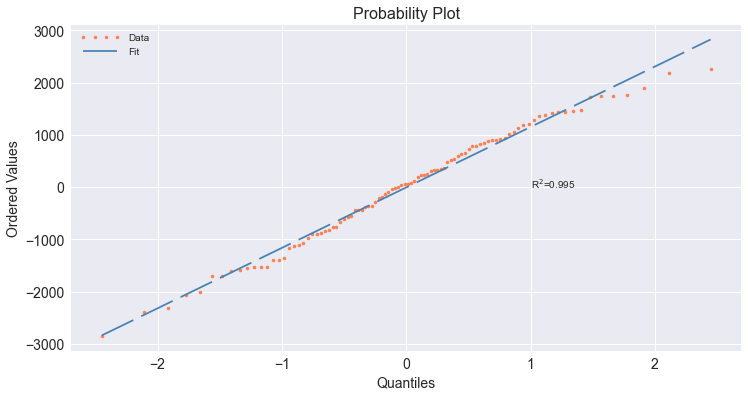

In [105]:
(osm,osr), (slope, intercept, r) = st.probplot(carsales_residual, dist='norm', fit=True)
line_func = lambda x: slope*x + intercept

fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(osm,osr,'.', label='Data', color='Coral')
ax.plot(osm, line_func(osm),color='SteelBlue',dashes=(20,5), label='Fit')
ax.set_xlabel('Quantiles')
ax.set_ylabel('Ordered Values')
ax.text(1, -14, f'R$^2$={r:.3f}')
ax.set_title('Probability Plot')
ax.legend(loc='best', numpoints=4, handlelength=4)
plt.show()

### differencing

In [106]:
diff1 = carsales.diff(periods=1)
diff1

,Sales
Month,
1960-01-01,NaN
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
...,...
1968-08-01,-1302.0
1968-09-01,-2337.0
1968-10-01,6957.0


<AxesSubplot:title={'center':'Car Sales'}, xlabel='Month'>

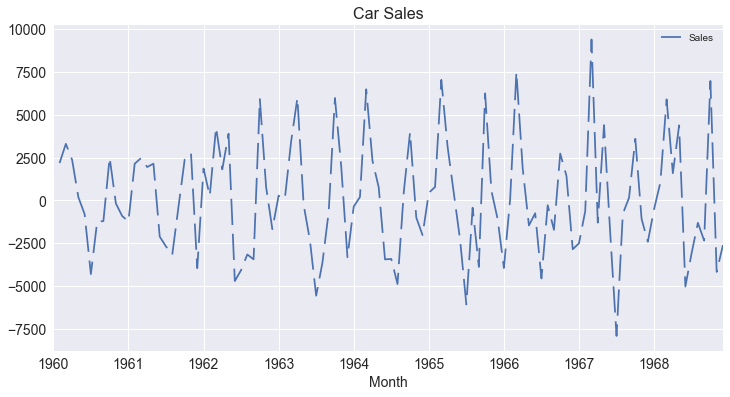

In [107]:
diff1.plot(figsize=(12,6), title='Car Sales', label='diff 1 period', dashes=(15,5))

looks like the trend already removed, but seems seasonal pattern still have. Let's use ADF to check.

In [114]:
do_adf_test(diff1.dropna())

ADF Test Statistic	-5.871049355674355
P-Value 		3.2396597814355147e-07
# Lags Used 		9
# Observations Used 	97
Critical Value (1%) 	 -3.4996365338407074
Critical Value (5%) 	 -2.8918307730370025
Critical Value (10%) 	 -2.5829283377617176


From the values can conclude that it is stationary.  
It is quite rare to do second order diff (do diff one the first result of diff).  
If first time diff still not stationary, then can do second level of differencing.

## modeling, ARIMA

With the AR (auto regressive), the intention is to use the data already known to predict the future data.

$$
y_i = a_0 + \sum_{j=1}^p {a_j y_{i-j}} + \epsilon_i
$$

With the MA (moving average) is to use the error to predict the future data.

$$
y_i = \mu + \epsilon_i + \sum_{j=1}^q {b_j \epsilon_{i-j}}
$$

for ARIMA, have 3 parameters $(p,d,q)$, and 4 parameters $(P,D,Q,s)$ for seasonal component.  
$p$ is for the AR model, how many history data to be used to predict future data.  
$q$ is for the MA model, how many error count in for predicting future data.  
$d$ is for how many level of diffrencing, to make the data stationary.  
the $P,D,Q$ of seasonal component is similar. $s$ is cycle periods.

### deciding the parameter  

Rules can be used when deciding (p, q, d) values:  
- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values

Let's remove the season decomposition and keeps trend and residual.

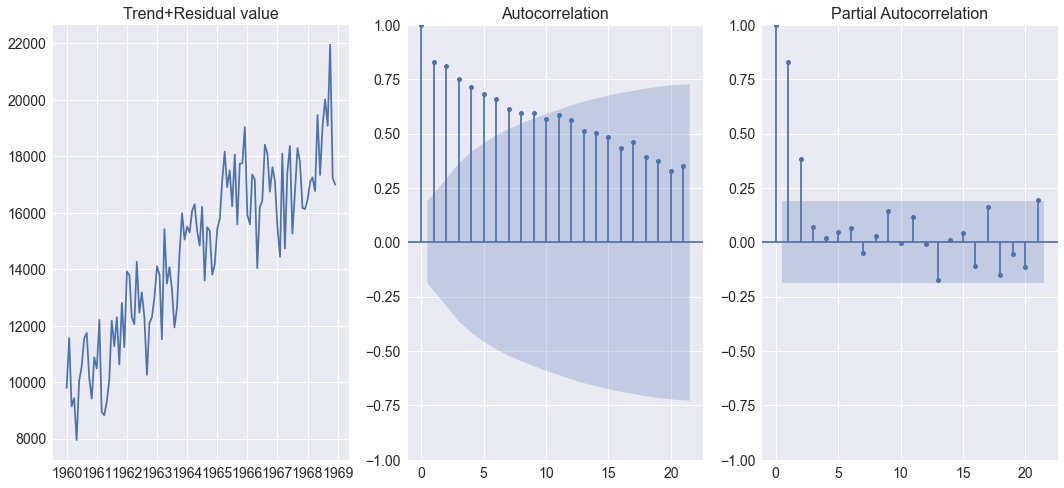

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,3,figsize=(18,8))
trend_residual = carsales.sub(carsales_seasonal, axis=0)
axes[0].plot(carsales.index, trend_residual['Sales'])
axes[0].set_title('Trend+Residual value')
plot_acf(trend_residual['Sales'].dropna(),ax=axes[1])
plot_pacf(trend_residual['Sales'].dropna(),ax=axes[2],method='ywm')

plt.show()

It is not stationary.

Get the difference again. We already know that the seasonal data periods = 12. so do difference as follow: (diff12 is the data removed seasonal part. diff12_diff1 is the data we make and try to find the non-seasonal part parameter $p,d,q$)

In [130]:
diff12 = carsales.diff(periods=12)
diff12_diff1 = diff12.diff(periods=1)
diff12_diff1

,Sales
Month,
1960-01-01,NaN
1960-02-01,NaN
1960-03-01,NaN
1960-04-01,NaN
1960-05-01,NaN
...,...
1968-08-01,-516.0
1968-09-01,-2501.0
1968-10-01,3368.0


In [132]:
do_adf_test(diff12_diff1.dropna())

ADF Test Statistic	-3.345096536305219
P-Value 		0.01297913109073938
# Lags Used 		11
# Observations Used 	83
Critical Value (1%) 	 -3.5117123057187376
Critical Value (5%) 	 -2.8970475206326833
Critical Value (10%) 	 -2.5857126912469153


It is stationary series.

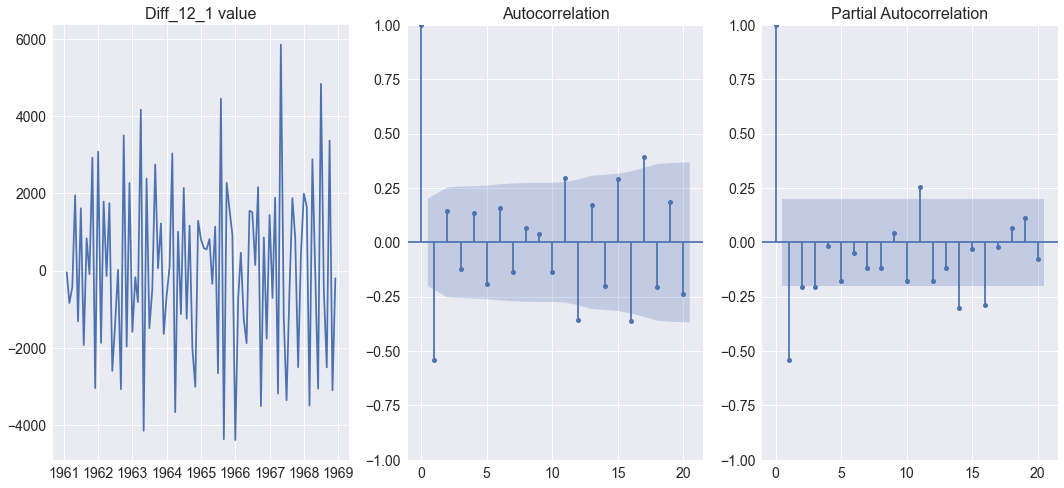

In [137]:
fig, axes = plt.subplots(1,3,figsize=(18,8))

axes[0].plot(diff1.index, diff12_diff1['Sales'])
axes[0].set_title('Diff_12_1 value')
plot_acf(diff12_diff1['Sales'].dropna(),ax=axes[1])
plot_pacf(diff12_diff1['Sales'].dropna(),ax=axes[2],method='ywm')

plt.show()

So for non-seasonal model, p=1, q=1, d=1. (the autocorrelation at position 1 is obviously outside of range. so select q=1. for partial autocorrelation also position 1 is obviously outside of range, so select p=1. here we are using 1 periods difference so d=1.)  


We go back to diff12 data try to find the parameter $(P,D,Q,s)$ for seasonal part.

In [138]:
do_adf_test(diff12.dropna())

ADF Test Statistic	-3.644396602406014
P-Value 		0.004966833586579756
# Lags Used 		11
# Observations Used 	84
Critical Value (1%) 	 -3.510711795769895
Critical Value (5%) 	 -2.8966159448223734
Critical Value (10%) 	 -2.5854823866213152


from the augmated Dickey-Fuller test, the diff(12) which remove the seasonal data, (keeps trend+residual), is also stationary.

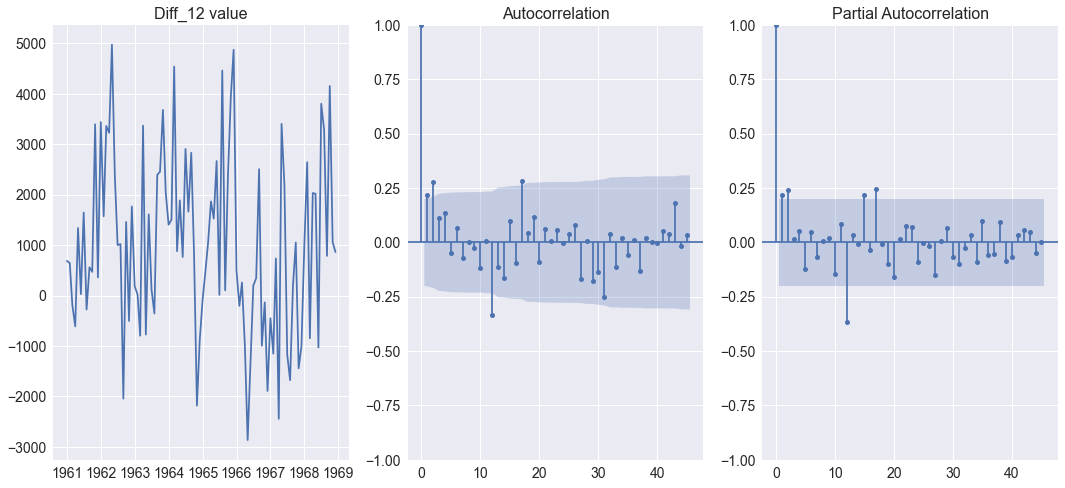

In [141]:
fig, axes = plt.subplots(1,3,figsize=(18,8))

axes[0].plot(diff1.index, diff12['Sales'])
axes[0].set_title('Diff_12 value')
plot_acf(diff12['Sales'].dropna(),ax=axes[1], lags=45)
plot_pacf(diff12['Sales'].dropna(),ax=axes[2],method='ywm', lags=45)

plt.show()

ACF and PACF both has spikes at 0, negative at 12. This 2 obviously outside of the noise range.  
so for seasonal data, parameter: P=1, Q=1, D=1, S=12.

In [155]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

model = ARIMA(carsales, order=(1, 1, 1), seasonal_order=(1,1,1,12), freq='MS', missing='drop')
arimares = model.fit()
print(arimares.summary())

C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                    SARIMAX Results                                     
Dep. Variable:                            Sales   No. Observations:                  108
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -837.667
Date:                          Thu, 30 Sep 2021   AIC                           1685.335
Time:                                  03:05:12   BIC                           1698.104
Sample:                              01-01-1960   HQIC                          1690.494
                                   - 12-01-1968                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2093      0.123      1.696      0.090      -0.033       0.451
ma.L1         -0.8889      0.064    -13.983      0.

In [156]:
print(arimares.aic, arimares.bic, arimares.hqic)

1685.3346637985833 1698.1040482565859 1690.4944531410868


In [157]:
predict_res = arimares.predict(start='1960-02-01', end='1970-12-01')
predict_res

1960-02-01     4766.550122
1960-03-01     6883.371010
1960-04-01     9584.328082
1960-05-01    11909.704089
1960-06-01    12957.150545
                  ...     
1970-08-01    17536.678405
1970-09-01    15934.109726
1970-10-01    21539.952380
1970-11-01    18899.444694
1970-12-01    16375.279271
Freq: MS, Name: predicted_mean, Length: 131, dtype: float64

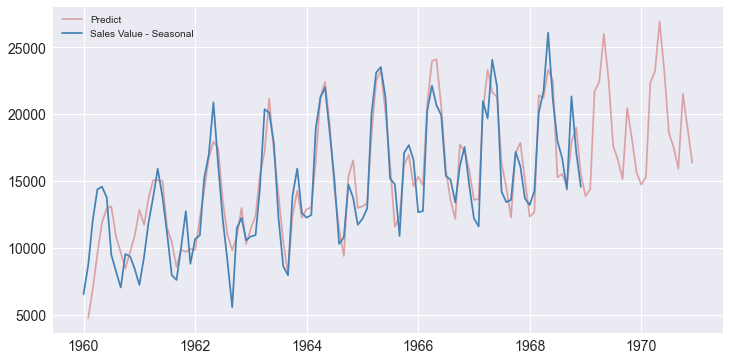

In [158]:
plt.plot(pd.date_range(start='1960-02-01', end='1970-12-01', freq='MS'), predict_res, color='IndianRed', alpha=0.5, label='Predict')
plt.plot(carsales,color='SteelBlue', label='Sales Value - Seasonal')
plt.legend(loc='best')

The forcast outside the sample scope, looks ok. the trend seems slow down even peak show decreasing, something need further investigate in the model.